<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


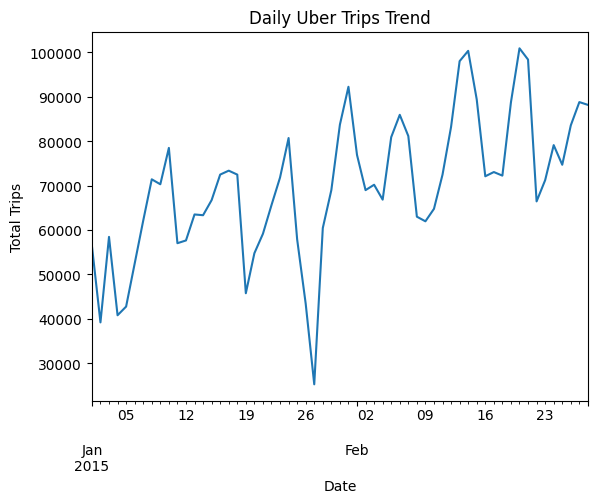

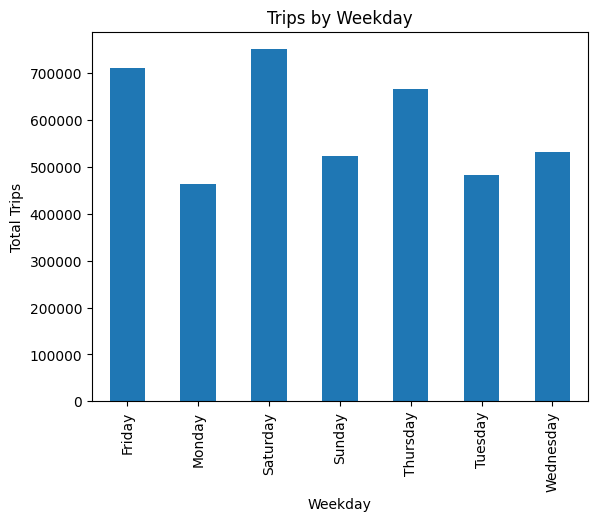

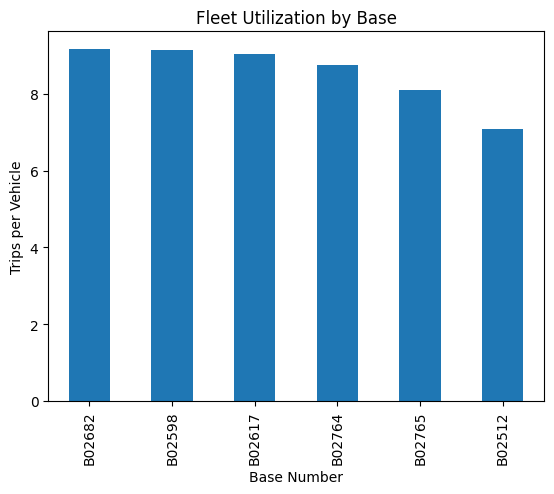

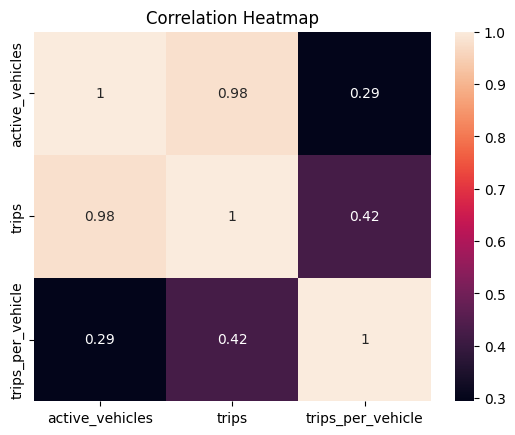

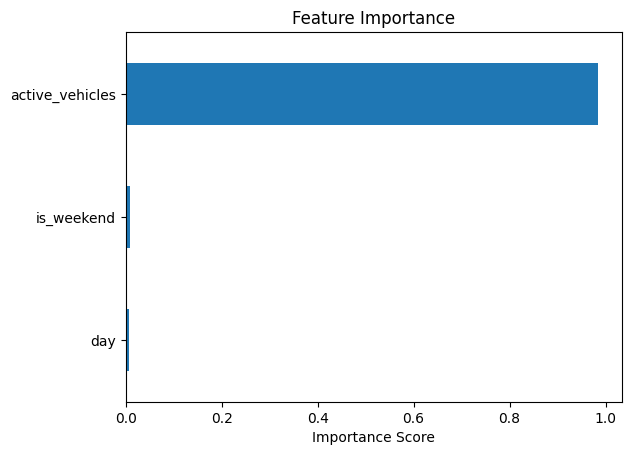

Key Insights:
1. Active vehicles strongly influence total trips
2. Fleet utilization varies across dispatching bases
3. Weekend demand differs from weekdays
4. ML model can predict trip demand with good accuracy
Conclusion:
This analysis helps Uber optimize vehicle allocation, reduce idle time, and improve operational efficiency using data-driven insights.


In [4]:
# 🚖 Uber Trip Analysis – Advanced Data Analytics Project
# Dataset: Uber-Jan-Feb-FOIL.csv
# Tools: Python, Machine Learning, SQL, Excel
# Environment: Jupyter Notebook

# =====================================================
# 1️⃣ IMPORT REQUIRED LIBRARIES
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# =====================================================
# 2️⃣ LOAD DATASET
# =====================================================
# Update the path if required
file_path = "Uber-Jan-Feb-FOIL.csv"
df = pd.read_csv(r"C:\Users\RUPALI\Desktop\uber_analysis\Uber-Jan-Feb-FOIL.csv")

# View first few rows
df.head()

# =====================================================
# 3️⃣ DATA UNDERSTANDING
# =====================================================
# Dataset information
df.info()

# Statistical summary
df.describe()

# Check missing values
df.isnull().sum()

# =====================================================
# 4️⃣ DATA CLEANING
# =====================================================
# Convert date column safely
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

# Remove rows with invalid dates
df = df.dropna(subset=['date'])

# Continue cleaning
df = df[df['trips'] > 0]
df = df[df['active_vehicles'] > 0]


# =====================================================
# 5️⃣ FEATURE ENGINEERING (ADVANCED)
# =====================================================
# Extract time-based features
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Fleet utilization feature
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']

# View engineered features
df.head()

# =====================================================
# 6️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# =====================================================
# Daily trips trend
daily_trips = df.groupby('date')['trips'].sum()

plt.figure()
daily_trips.plot(title='Daily Uber Trips Trend')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.show()

# Trips by weekday
plt.figure()
df.groupby('weekday')['trips'].sum().plot(kind='bar', title='Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Trips')
plt.show()

# =====================================================
# 7️⃣ FLEET UTILIZATION ANALYSIS
# =====================================================
# Average trips per vehicle by base
fleet_efficiency = df.groupby('dispatching_base_number')['trips_per_vehicle'].mean()
fleet_efficiency.sort_values(ascending=False)

plt.figure()
fleet_efficiency.sort_values(ascending=False).plot(kind='bar', title='Fleet Utilization by Base')
plt.xlabel('Base Number')
plt.ylabel('Trips per Vehicle')
plt.show()

# =====================================================
# 8️⃣ CORRELATION ANALYSIS
# =====================================================
plt.figure()
sns.heatmap(df[['active_vehicles', 'trips', 'trips_per_vehicle']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# =====================================================
# 9️⃣ MACHINE LEARNING – DEMAND PREDICTION
# =====================================================
# Feature selection
X = df[['active_vehicles', 'day', 'is_weekend']]
y = df['trips']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model initialization
model = RandomForestRegressor(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# =====================================================
# 🔟 MODEL EVALUATION
# =====================================================
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

# =====================================================
# 1️⃣1️⃣ FEATURE IMPORTANCE
# =====================================================
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

plt.figure()
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance Score')
plt.show()

# =====================================================
# 1️⃣2️⃣ BUSINESS INSIGHTS
# =====================================================
print("Key Insights:")
print("1. Active vehicles strongly influence total trips")
print("2. Fleet utilization varies across dispatching bases")
print("3. Weekend demand differs from weekdays")
print("4. ML model can predict trip demand with good accuracy")

# =====================================================
# 1️⃣3️⃣ CONCLUSION
# =====================================================
print("Conclusion:")
print("This analysis helps Uber optimize vehicle allocation, reduce idle time, and improve operational efficiency using data-driven insights.")

# ===================== END OF NOTEBOOK =====================
